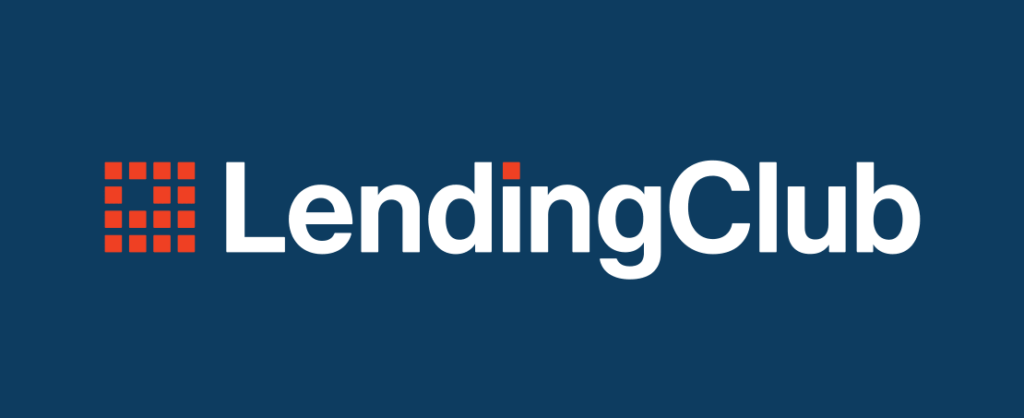

# **LENDING CLUB LOAN DATA ANALYSIS**

**DESCRIPTION**

Create a model that predicts whether or not a loan will be default using the historical data.

**Problem Statement:** 

For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that makes this problem more challenging.

**Domain: Finance**

Analysis to be done: Perform data preprocessing and build a deep learning prediction model. 

**Content:**

**Dataset columns and definition:**

credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

installment: The monthly installments owed by the borrower if the loan is funded.

log.annual.inc: The natural log of the self-reported annual income of the borrower.

dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

fico: The FICO credit score of the borrower.

days.with.cr.line: The number of days the borrower has had a credit line.

revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).


**Steps to perform:**

Perform exploratory data analysis and feature engineering and then apply feature engineering. Follow up with a deep learning model to predict whether or not the loan will be default using the historical data.

 
**Tasks:**
1.     Feature Transformation. Transform categorical values into numerical values (discrete)
2.     Exploratory data analysis of different factors of the dataset.
3.     Additional Feature Engineering. You will check the correlation between features and will drop those features which have a strong correlation. This will help reduce the number of features and will leave you with the most relevant features.
4.     Modeling. After applying EDA and feature engineering, you are now ready to build the predictive models. In this part, you will create a deep learning model using Keras with Tensorflow backend

## **IMPORT LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


## **LOAD & UNDERSTAND DATA**

In [ ]:
data = pd.read_csv("loan_data.csv")
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### Total no of Records and Features

In [ ]:
print("Total no of records and features in data: ", data.shape[0]," records & ", data.shape[1], " features")

Total no of records and features in data:  9578  records &  14  features


**Analysis:** There are **9578** Records and **14** Features

### Get Information about the data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


<b>Train data has 3 different data type features:</b><br>
<b>Float :</b>  6 Features<br>
<b>Int   :</b>  7 features<br>
<b>Object:</b>  1 features

### Description - Feature wise statestical analysis

In [ ]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


## **DATA PREPROCESSING**

### **Check for Duplicate Values**

In [ ]:
data.duplicated().any()

False

**Analysis:** There is **NO Duplicate Value** in the data

### **Check for Null Values**

In [ ]:
data.isnull().any()

credit.policy        False
purpose              False
int.rate             False
installment          False
log.annual.inc       False
dti                  False
fico                 False
days.with.cr.line    False
revol.bal            False
revol.util           False
inq.last.6mths       False
delinq.2yrs          False
pub.rec              False
not.fully.paid       False
dtype: bool

**Analysis:** There is no **NULL Value** in the data

### **Separate out Numeric Feature and Categorical Feature**

In [ ]:
numericfeatures = [col for col in data.columns if (data[col].dtype == 'float64') 
                   | (data[col].dtype == 'int64')]
numericfeatures

['credit.policy',
 'int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs',
 'pub.rec',
 'not.fully.paid']

In [ ]:
objectfeatures = [obj for obj in data.columns if data[obj].dtype == 'object']
objectfeatures

['purpose']

### <b>Check for Negative Values</b>

In [ ]:
for column in numericfeatures:
  if(data[column] < 0).any():
    print("Negative Value present in column: ", column)
  else:
    print("No Negative Value present in column: ", column)

No Negative Value present in column:  credit.policy
No Negative Value present in column:  int.rate
No Negative Value present in column:  installment
No Negative Value present in column:  log.annual.inc
No Negative Value present in column:  dti
No Negative Value present in column:  fico
No Negative Value present in column:  days.with.cr.line
No Negative Value present in column:  revol.bal
No Negative Value present in column:  revol.util
No Negative Value present in column:  inq.last.6mths
No Negative Value present in column:  delinq.2yrs
No Negative Value present in column:  pub.rec
No Negative Value present in column:  not.fully.paid


### **Checking for Outliers**

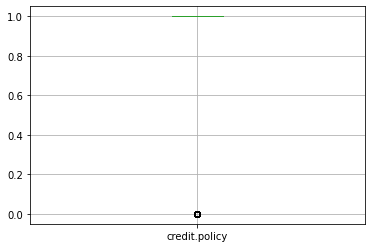

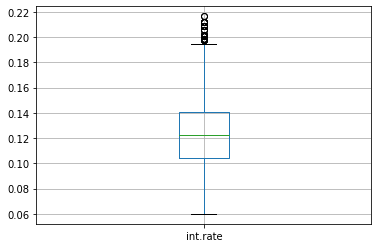

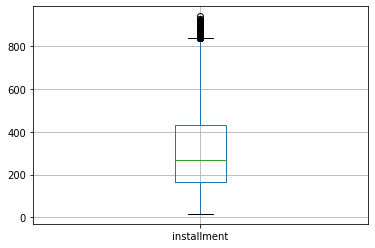

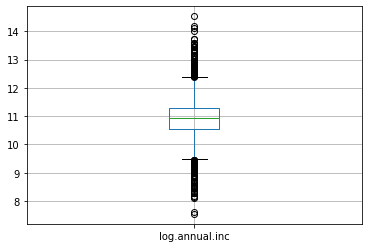

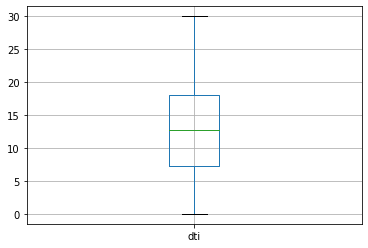

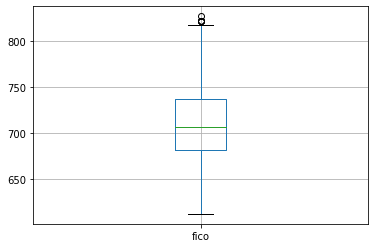

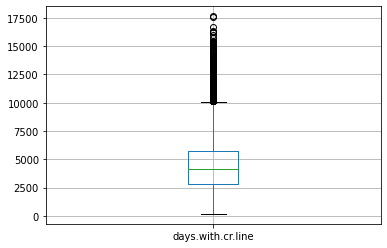

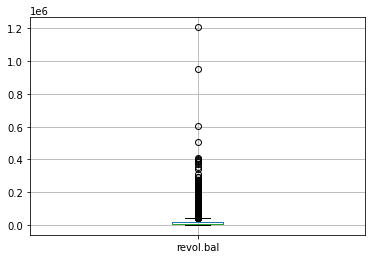

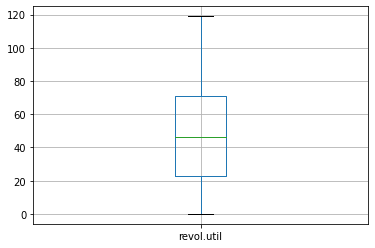

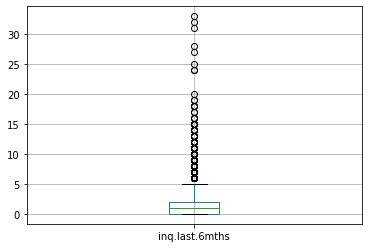

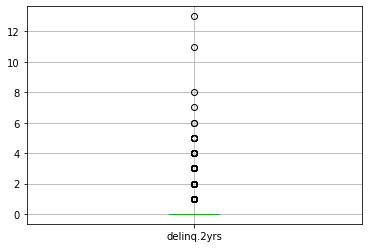

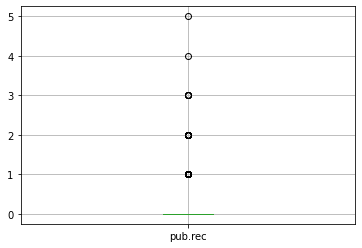

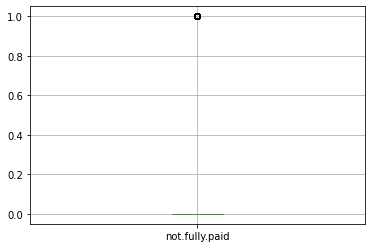

In [ ]:
for column in numericfeatures:
    plt.figure()
    data.boxplot([column])

In [ ]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.nanpercentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 print("Lower bound: ", lower_range, "Upper bound: ", upper_range)
 if ((datacolumn < lower_range).any() or (datacolumn > upper_range).any()):
  outliers = (datacolumn < lower_range).sum() + (datacolumn > upper_range).sum()
  print(outliers, " No of Outliers present: ", "\n")
 else:
  print("No Outliers Detected", "\n")
 return lower_range,upper_range

In [ ]:
# Running loop over the Data Frame with Numeric (Continuous) Values
lowerbound = []
upperbound = []
for column in numericfeatures:
  print("Outlier check for column: ",column)
  lowerbound_column, upperbound_column = outlier_treatment(data[column])
  lowerbound.append(lowerbound_column)
  upperbound.append(upperbound_column)

Outlier check for column:  credit.policy
Lower bound:  1.0 Upper bound:  1.0
1868  No of Outliers present:  

Outlier check for column:  int.rate
Lower bound:  0.04870000000000003 Upper bound:  0.19589999999999996
51  No of Outliers present:  

Outlier check for column:  installment
Lower bound:  -239.71874999999991 Upper bound:  836.2512499999998
236  No of Outliers present:  

Outlier check for column:  log.annual.inc
Lower bound:  9.459094423749999 Upper bound:  12.390612013750005
238  No of Outliers present:  

Outlier check for column:  dti
Lower bound:  -8.893750000000004 Upper bound:  34.056250000000006
No Outliers Detected 

Outlier check for column:  fico
Lower bound:  599.5 Upper bound:  819.5
6  No of Outliers present:  

Outlier check for column:  days.with.cr.line
Lower bound:  -1545.0 Upper bound:  10095.0
346  No of Outliers present:  

Outlier check for column:  revol.bal
Lower bound:  -19406.75 Upper bound:  40843.25
780  No of Outliers present:  

Outlier check for co

## **TASK 1 - Feature Transformation**

In [ ]:
data[objectfeatures].head(10)

,purpose
0,debt_consolidation
1,credit_card
2,debt_consolidation
3,debt_consolidation
4,credit_card
5,credit_card
6,debt_consolidation
7,all_other
8,home_improvement
9,debt_consolidation


In [ ]:
for column in data[objectfeatures]:
  print(data[column].unique())

['debt_consolidation' 'credit_card' 'all_other' 'home_improvement'
 'small_business' 'major_purchase' 'educational']


In [ ]:
data["purpose"].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [ ]:
workData = data.copy()

In [ ]:
labelEncoder = LabelEncoder()
workData['purpose'] = labelEncoder.fit_transform(np.array(workData[['purpose']]))
workData['purpose']

0       2
1       1
2       2
3       2
4       1
       ..
9573    0
9574    0
9575    2
9576    4
9577    2
Name: purpose, Length: 9578, dtype: int64

In [ ]:
workData["purpose"].value_counts()

2    3957
0    2331
1    1262
4     629
6     619
5     437
3     343
Name: purpose, dtype: int64

In [ ]:
# binary encode
onehotEncoder = OneHotEncoder(sparse=False)
#integerEncoded = integerEncoded.reshape(len(integerEncoded), 1)
integerEncoded = np.array(workData.purpose).reshape(len(np.array(workData.purpose)),1)
onehotEncoded = onehotEncoder.fit_transform(integerEncoded)

In [ ]:
oneHotEncodedFrame = pd.DataFrame(onehotEncoded)
oneHotEncodedFrame

,0,1,2,3,4,5,6
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
9573,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9574,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9575,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9576,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
workData.drop(columns='purpose', axis=1, inplace=True)
workData.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
finalData = pd.concat([workData,oneHotEncodedFrame], axis=1)
finalData.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,0,1,2,3,4,5,6
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## **VISUALIZING DATA**

<Figure size 1800x1080 with 0 Axes>

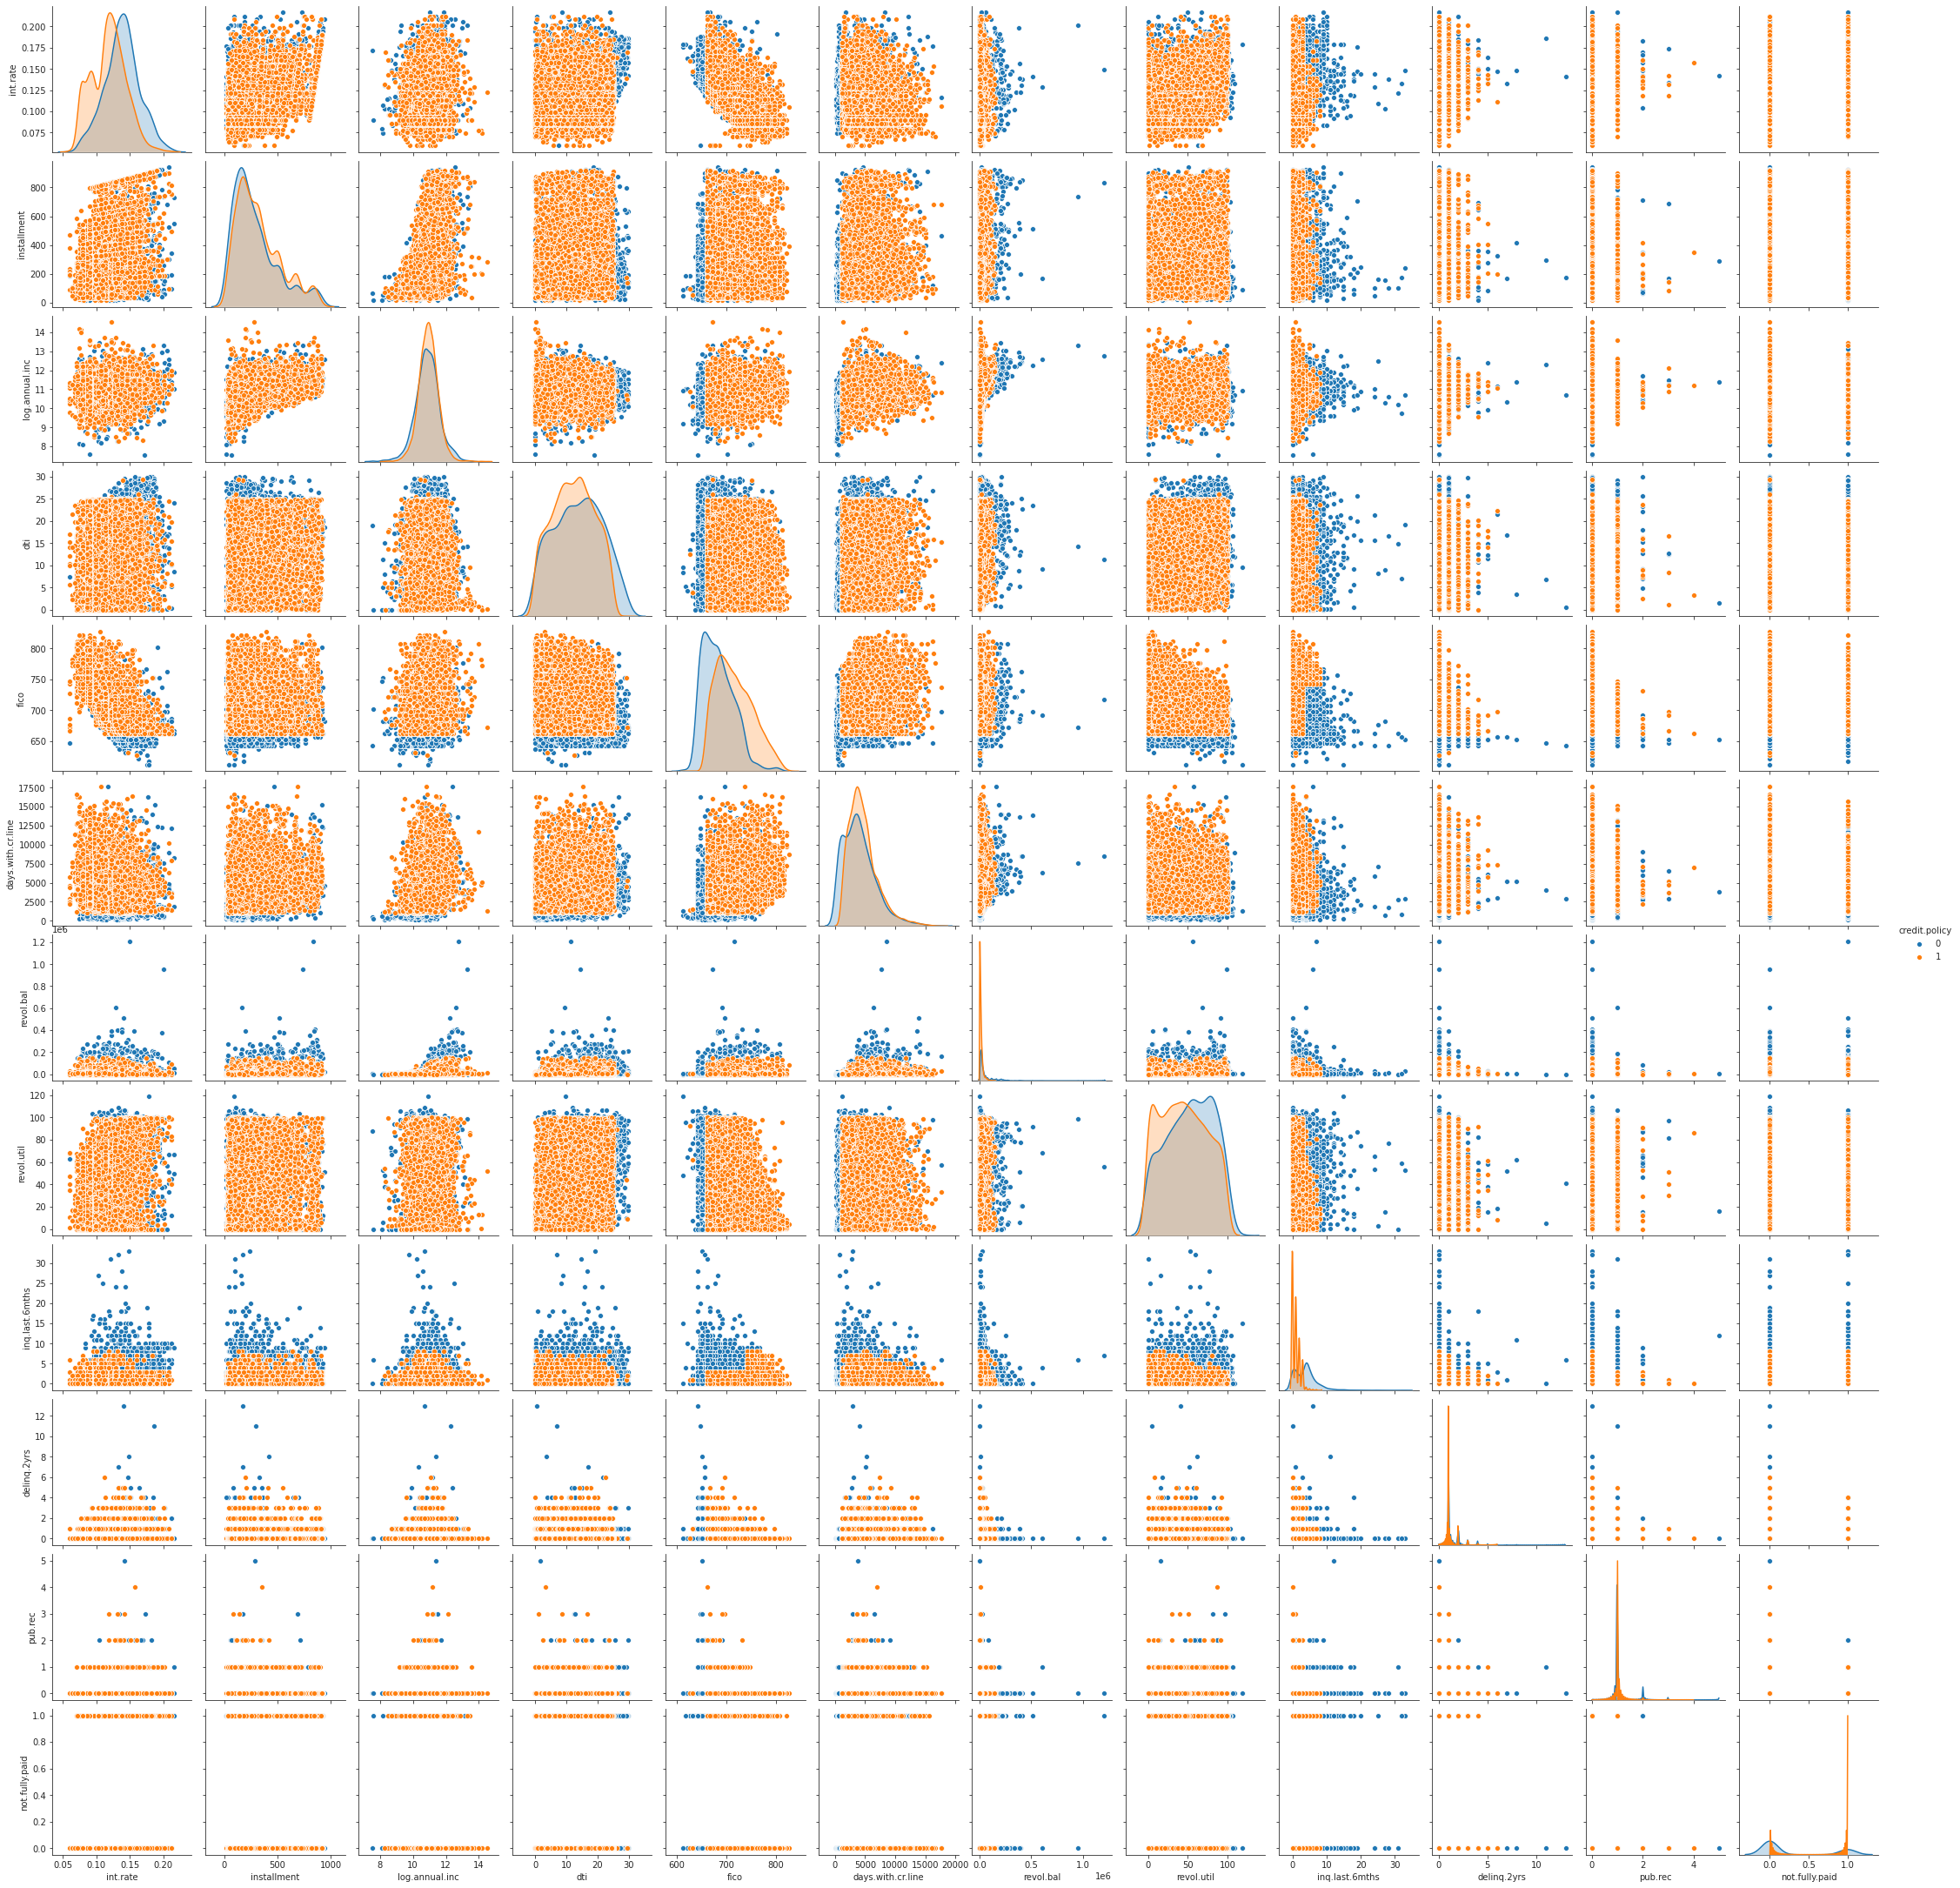

In [ ]:
sns.set_style(style = 'ticks')
plt.figure(figsize=(25,15))
sns.pairplot(workData, hue = 'credit.policy')

## **CHECK BALANCED OR UNBALANCED DATA**

In [ ]:
finalData['credit.policy'].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

**Analysis:** The Data is an **Unbalanced** Data

## **SEPERATE OUT FEATURE AND LABEL**

In [ ]:
features = finalData.iloc[:,1:].values
label = finalData.iloc[:,[0]].values

In [ ]:
print("Dimension for features is: ", features.ndim, "\t", "Dimension for label is: ", label.ndim)

Dimension for features is:  2 	 Dimension for label is:  2


## **Task 3.Additional Feature Engineering**

You will check the correlation between features and will drop those features which have a strong correlation

This will help reduce the number of features and will leave you with the most relevant features

### **CORRELATON**

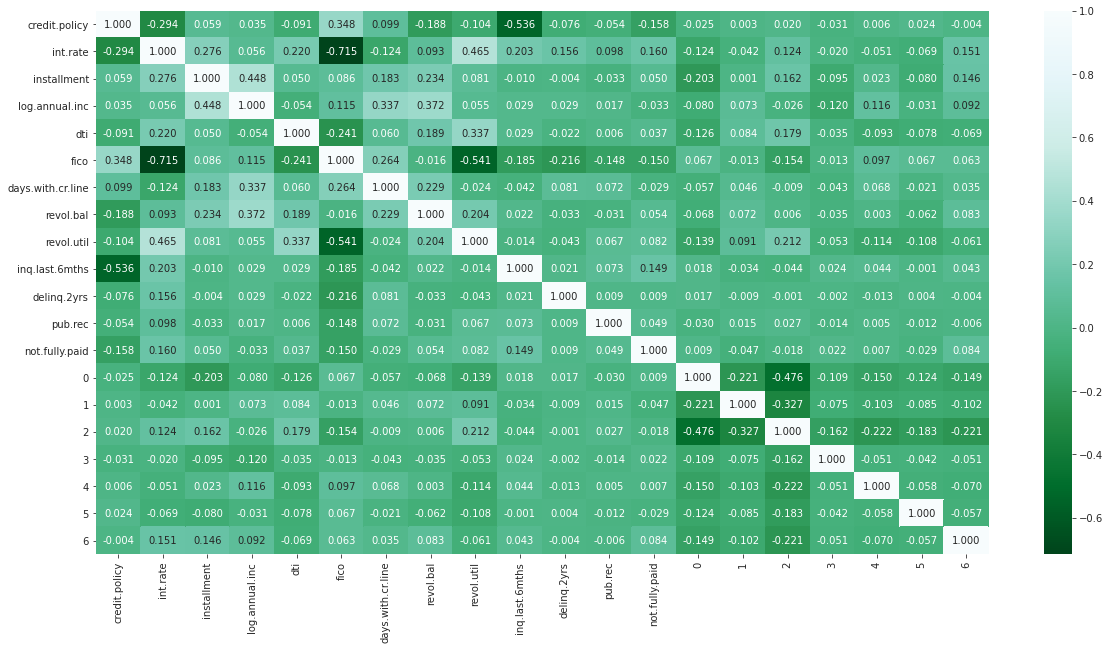

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(finalData.corr(),annot=True,cmap='BuGn_r',fmt='.3f')

In [ ]:
correlation = finalData.corr()

# Select upper triangle of correlation matrix
upper = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.50
highVarianceColumns = [column for column in upper.columns if any(abs(upper[column]) > 0.50)]

highVarianceColumns

['fico', 'revol.util', 'inq.last.6mths']

#### **Observations from Heatmap Plot**
 - From above Heatmap plot , we saw revol.util is highly negatively correlated  (above 0.5) with fico
 - fico is highly negatively correlated with interest rate 
 - inq.last.6mths is highly negatively correlated with our target variable,  
  
Keeping all the features in model building, as no high multicollenearity is seen. 

### **CALCULATE VIF SCORES FOR FEATURES**

In [ ]:
vif = pd.DataFrame()

def calc_vif(X):

    # Calculating VIF
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

X = finalData.iloc[:,1:]
calc_vif(X)

vif_high = vif.sort_values(by = 'VIF', ascending=False)
vif_high

,variables,VIF
14,2,835.154922
12,0,496.035701
13,1,268.403289
18,6,136.713879
16,4,136.349151
17,5,94.237587
15,3,72.799243
4,fico,3.370196
0,int.rate,2.946254
7,revol.util,1.767631


**Analysis:** Accoridng to the **VIF score**, we can remove the **purpose** feature, **fico** feature and **int.rate** feature

```
X0 = int.rate
X1 = installment
X2 = log.annual.inc 
X3 = dti
X4 = fico
X5 = days.with.cr.line
X6 = revol.bal
X7 = revol.util
X8 = inq.last.6mths
X9 = delinq.2yrs
X10 = pub.rec
X11 = not.fully.paid
X12 = 0
X13 = 1
X14 = 2
X15 = 3
X16 = 4
X17 = 5
X18 = 6
```



### **Feature Engineering Technique - RFE METHOD**

In [ ]:
# 1. Initialize the model algorithm
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression()

# 2. Apply RFE to model (ALL FEATURES AND LABEL)
from sklearn.feature_selection import RFE
selectFeaturesFromRFE = RFE(estimator=modelLR,
                           step=1) 

# Fit the data with RFE
selectFeaturesFromRFE.fit(features,label)

# 3. Get Features with High Ranking (1,2,3,4,...) (Get features that has Rank 1. Sometimes Rank 2 is considered)
print(selectFeaturesFromRFE.ranking_)

[ 1  9  1  5  6 10 11  7  1  1  3  1  1  1  1  1  4  8  2]


**Analysis:** Features selected throuh RFE: **int.rate, fico, inq.last.month**

### **Feature Engineering - Select By Model (SBM) method**

In [ ]:
# Initialize the model algorithm
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression()

# 2. Apply SBM to model (ALL FEATURES AND LABEL)
from sklearn.feature_selection import SelectFromModel
selectFeaturesFromSFM = SelectFromModel(modelLR)

# Fit the data with SFM
selectFeaturesFromSFM.fit(features,label)

# 3. Get Features with True value
print(selectFeaturesFromSFM.get_support())

[False False  True  True False False False False  True False False False
 False False False False False False False]


**Analysis:** Features selected through SBM are **log.annual.int, dti and inq.last.month**

## **FINAL FEATURE SELECTED FOR MODELLING**

In [ ]:
finalFeatures = features[:,[0,2,3,8]]

## **APPLYING STANDARD SCALER**

In [ ]:
#initialize scalar
standardScaler = StandardScaler()
finalFeatures = standardScaler.fit_transform(finalFeatures)
features = standardScaler.fit_transform(features)

## **TRAIN TEST SPLIT**

In [ ]:
seed = 2000

X_train,X_test,y_train,y_test = train_test_split(finalFeatures,
                                                label,
                                                test_size=0.2,
                                                random_state = seed)
tf.random.set_seed(seed)
np.random.seed(seed)

## **Task 4: Modeling**

In [ ]:
# Architect the model
model = tf.keras.models.Sequential()
# using units = 3*4 
# input shape = 4
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense( units = 12, activation= 'relu',input_dim = 4 ))
model.add(tf.keras.layers.Dense( units = 12, activation= 'relu' ))
model.add(tf.keras.layers.Dense( units = 12, activation= 'relu' ))
model.add(tf.keras.layers.Dense( units = 1, activation= 'sigmoid' ))

In [ ]:
# Compile model
model.compile(optimizer = "Adam" , 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, cl):
        super(MyThresholdCallback, self).__init__()
        self.cl = cl
        
    def on_epoch_end(self, epoch, logs=None):
        test_score = logs["val_accuracy"]
        train_score = logs["accuracy"]
        if ( test_score > train_score and test_score > self.cl ) or test_score == 1 :
            self.model.stop_training = True

In [ ]:
myScoreMonitor = MyThresholdCallback(cl=0.90)

epoch_hist = model.fit(X_train,
                       y_train,
                       epochs=50,
                       validation_data=(X_test,y_test),
                       callbacks= [myScoreMonitor] )

Epoch 1/50
240/240 [==============================] - 1s 4ms/step - loss: 0.2590 - accuracy: 0.9075 - val_loss: 0.2734 - val_accuracy: 0.9108


## **EVALUATING THE MODEL**

In [ ]:
predlabel= model.predict_classes(finalFeatures)
confusion_matrix(label,predlabel)

array([[1180,  688],
       [ 179, 7531]])

In [ ]:
print(classification_report(label,predlabel))

              precision    recall  f1-score   support

           0       0.87      0.63      0.73      1868
           1       0.92      0.98      0.95      7710

    accuracy                           0.91      9578
   macro avg       0.89      0.80      0.84      9578
weighted avg       0.91      0.91      0.90      9578



**Theory:** A Good Customer (credit.policy = 1) should not be predicted as the Bad Customer (credit.policy = 0)

**Recall** of 1 and **Precision** of 0 = 0.925 

Since the Average 0.925 > CL 0.90 hence the model is **ACCEPTABLE**

## **SAVE THE MODEL**

In [ ]:
model.save('LoanPredictor.tf')
model.save('Loan_Predictor.h5')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: LoanPredictor.tf/assets
